In [1]:
import re
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## 1. Exploratory Data Analysis


In [2]:
dataset = pd.read_csv("../data/book_review_labelled_data.csv")
dataset.head()

,reviewerID,reviewerName,reviewText,overall,summary,reviewTime,rates_count,helpful_count,rating
0,A3UPFTGAWZ3G2R,David J. Loftus,"Jenkins, a history professor and Member of Par...",4,"Quite readable, nicely done","12 6, 2001",40,37,4
1,A1XTKTLNSCRLDS,Ellen Rappaport,Detective Inspector Erlendur Sveinsson is at h...,5,Mesmerizing in depth,"02 23, 2014",0,0,5
2,A1A77B6DQQH436,"crescamp ""esc""",I didn't read this. I purchased it for a gift...,3,10-minute life lessons for kids,"02 12, 2013",3,0,3
3,AEAF4MRYHJZI,"Angelia Menchan ""acvermen.blogspot.com""",Fierce Angels by Sheri Park reads like a disse...,4,So FIERCE,"03 24, 2010",9,9,4
4,A3B7KU72LGWFER,"Grifel ""Tea Time""",Clearly this author had two goals in mind: 1) ...,1,Drivel!,"06 21, 2003",19,13,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49992 entries, 0 to 49991
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewerID     49992 non-null  object
 1   reviewerName   49992 non-null  object
 2   reviewText     49992 non-null  object
 3   overall        49992 non-null  int64 
 4   summary        49992 non-null  object
 5   reviewTime     49992 non-null  object
 6   rates_count    49992 non-null  int64 
 7   helpful_count  49992 non-null  int64 
 8   rating         49992 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.4+ MB


Very few `NaN` (just one) so we can just drop them to avoid problems processing later on:

In [4]:
dataset = dataset.dropna()


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49992 entries, 0 to 49991
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewerID     49992 non-null  object
 1   reviewerName   49992 non-null  object
 2   reviewText     49992 non-null  object
 3   overall        49992 non-null  int64 
 4   summary        49992 non-null  object
 5   reviewTime     49992 non-null  object
 6   rates_count    49992 non-null  int64 
 7   helpful_count  49992 non-null  int64 
 8   rating         49992 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.8+ MB


In [6]:
dataset.describe()

,overall,rates_count,helpful_count,rating
count,49992.000000,49992.000000,49992.000000,49992.000000
mean,4.164426,5.074812,3.724076,4.164426
std,1.105327,25.807119,22.546547,1.105327
min,1.000000,0.000000,0.000000,1.000000
25%,4.000000,0.000000,0.000000,4.000000
50%,5.000000,1.000000,0.000000,5.000000
75%,5.000000,4.000000,2.000000,5.000000
max,5.000000,3131.000000,2878.000000,5.000000


In [7]:
dataset.reviewerName.value_counts()

Amazon Customer        990
Harriet Klausner       208
Kindle Customer         94
Bookreporter            66
Midwest Book Review     58
                      ... 
Indiana Customer         1
another reader           1
Pashminky                1
Mark Wagenschutz         1
M. Cantley               1
Name: reviewerName, Length: 36047, dtype: int64

<AxesSubplot:>

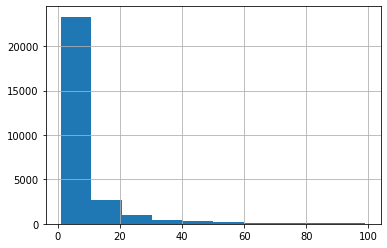

In [8]:
dataset[(dataset.rates_count > 0) & (dataset.rates_count < 100)].rates_count.hist()

<AxesSubplot:>

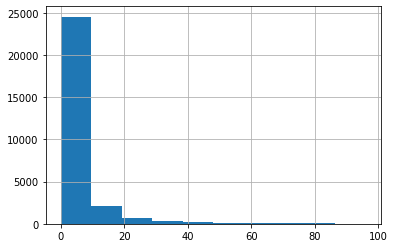

In [9]:
dataset[(dataset.rates_count > 0) & (dataset.rates_count < 100)].helpful_count.hist()

In [10]:
dataset["helpful_percent"] = dataset.apply(
    lambda row: 100.0 * row.helpful_count/row.rates_count if row.rates_count else 0.0, 
    axis=1
)


<AxesSubplot:>

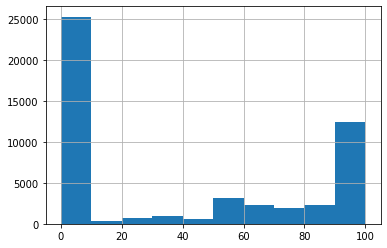

In [11]:
dataset.helpful_percent.hist()

In [12]:
dataset_filtered = dataset[dataset.rates_count != 0]


In [13]:
dataset_filtered.describe()

,overall,rates_count,helpful_count,rating,helpful_percent
count,28423.000000,28423.000000,28423.000000,28423.000000,28423.000000
mean,3.977976,8.925870,6.550118,3.977976,69.065819
std,1.244624,33.720239,29.590732,1.244624,35.027416
min,1.000000,1.000000,0.000000,1.000000,0.000000
25%,3.000000,1.000000,1.000000,3.000000,50.000000
50%,4.000000,3.000000,2.000000,4.000000,80.000000
75%,5.000000,7.000000,5.000000,5.000000,100.000000
max,5.000000,3131.000000,2878.000000,5.000000,100.000000


<AxesSubplot:>

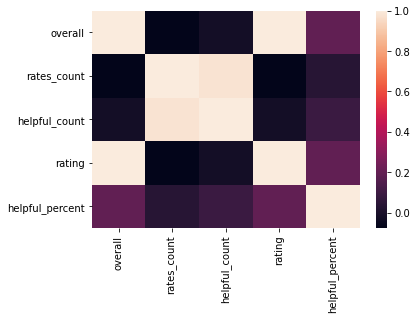

In [14]:
sns.heatmap(dataset_filtered.corr())

Some early conclusions:

* A lot of examples with rates_count = 0: these examples were excluded as they don't bring much information
* Slight correlation between overall rating given and percentage of helpful ratings given, but nothing too obvious

